# 预处理

In [1]:
import pandas as pd
data = pd.read_csv('../datacleaning/modified_data.csv',encoding= 'unicode_escape',sep=';')
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint- tienne,Ligue 1,22,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 9: invalid start byte
读取数据的时候报错，是有non ascii character encoded on it,改了一下encoding好了
不过人名好像会出现问号QAQ

In [2]:
import numpy as np
y = np.array(data['Pos'])
features_data = data.iloc[:,8:]

features_data.head()

,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,1,1,45,0.5,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [3]:
#转成np数组
X_features = np.asarray(features_data)

In [4]:
#数值标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_numeric = scaler.fit_transform(X_features)
X_features_numeric

array([[ 1.30832086e+00,  1.60205034e+00,  1.68366510e+00, ...,
        -6.16337577e-01, -1.19527777e-01, -7.32135404e-01],
       [ 1.30832086e+00,  1.77761504e+00,  1.78798370e+00, ...,
         1.83573903e-01, -2.21990833e-01,  7.95045287e-01],
       [ 1.05009848e+00,  1.33870331e+00,  1.25514066e+00, ...,
        -4.04748089e-01, -4.35826775e-01,  3.91639066e-01],
       ...,
       [ 1.48046912e+00,  1.60205034e+00,  1.58548289e+00, ...,
        -5.75051824e-01, -4.67011184e-01,  5.82016115e-04],
       [ 1.22224673e+00,  8.12009235e-01,  9.51389453e-01, ...,
         5.54040046e+00,  1.31495501e+00,  1.29724487e+00],
       [-5.85309969e-01, -4.16943602e-01, -5.76571191e-01, ...,
        -6.52462612e-01, -5.29380000e-01, -1.22909684e-01]])

In [5]:
X_features_numeric.shape

(2921, 135)

# KMAPPER

In [6]:
#import modules
import kmapper as km
import umap
import sklearn
import sklearn.manifold as manifold

import matplotlib.pyplot as plt
from kmapper.jupyter import display

from sklearn.decomposition import PCA
from sklearn import cluster
import networkx as nx
import community 

In [33]:
# 救命，还得用giotto-tda重新写过？？看看
from gtda import mapper
def isomap_umap(x):
    a = manifold.Isomap(n_components=10,n_jobs=-1)
    b = umap.UMAP(n_components=2, n_jobs=-1)
    return b.fit_transform(a.fit_transform(x))

pipe = mapper.make_mapper_pipeline(filter_func=umap.UMAP(n_components=2, n_jobs=-1),
                     cover=mapper.CubicalCover(n_intervals=10, overlap_frac=0.5),
                     clusterer=cluster.KMeans(n_clusters=5),
                     n_jobs=6,
                     #memory=mkdtemp(),
                     verbose=True)
def create_color_values(y):
    unique_labels = np.unique(y)
    color_values = ['1', '2', '3', '4', '5','6','7','8','9','10']
    label_to_color = dict(zip(unique_labels, color_values))
    return np.array([label_to_color[label] for label in y])
#mapper_graph = pipe.fit_transform(X_features_numeric)
a = manifold.Isomap(n_components=10,n_jobs=-1)
mapper.plot_interactive_mapper_graph(pipe, a.fit_transform(X_features_numeric), color_data=create_color_values(y))


[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   5.3s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   5.3s


ValueError: n_samples=3 should be >= n_clusters=5.

In [16]:
class sensitive_ana_performer():
    def __init__(self, X_features_numeric, y):
        self.X_features_numeric = X_features_numeric
        self.y = y
        self.projections = dict()
        # projection 1: isomap -> umap
        self.projections['isomap_umap2'] = [manifold.Isomap(n_components=10,n_jobs=-1), umap.UMAP(n_components=2,random_state=1, n_jobs=-1)]
        self.projections['isomap_umap3'] = [manifold.Isomap(n_components=10,n_jobs=-1), umap.UMAP(n_components=3,random_state=1, n_jobs=-1)]
        # projection 2: PCA -> 2 dim
        self.projections['pca2'] = PCA(n_components=2)
        # projection 2: PCA -> 3 dim
        self.projections['pca3'] = PCA(n_components=3)
        self.projections['pca4'] = PCA(n_components=4)

        self.coveroverlaps = [0.35, 0.5]
        #self.coveroverlaps.append(10)

        self.clusters = dict()
        self.clusters['KMeans5'] = cluster.KMeans(n_clusters=5, random_state=1618033)
        self.clusters['KMeans10'] = cluster.KMeans(n_clusters=10, random_state=1618033)
        self.clusters['DBSCAN'] = cluster.DBSCAN(eps=0.45, min_samples=2, n_jobs=-1)


    def _perform(self, projection, cubes, overlap, cluster, name=None, save=False):
        '''in: 超参数
        out: graph'''
        mapper = km.KeplerMapper(verbose=0)
        #project data
        projected_X = mapper.fit_transform(self.X_features_numeric, 
                                            projection = projection, scaler=[None])  
        # Create dictionary called 'graph' with nodes, edges and meta-information
        graph1 = mapper.map(projected_X, cover=km.Cover(n_cubes=cubes, perc_overlap=overlap),
                            clusterer=cluster)
        
        if not (name is None) and save:
            def create_color_values(y):
                unique_labels = np.unique(y)
                color_values = ['1', '2', '3', '4', '5','6','7','8','9','10']
                label_to_color = dict(zip(unique_labels, color_values))
                return np.array([label_to_color[label] for label in y])
            def node_color_func(node):
                labels, counts = np.unique(node, return_counts=True)
                max_count_index = np.argmax(counts)
                ans = create_color_values(labels)
                return ans[max_count_index] 
            #visualize
            mapper.visualize(graph1, path_html=name + '.html', title="mapper1",
                 custom_tooltips=y, color_values=create_color_values(self.y), color_function_name='node_color_func',
                 include_searchbar=True)
            
        return graph1
    
    def calculate_stats(self, graph):
        '''计算图的指标，作为敏感性判断的依据'''
        G = km.adapter.to_nx(graph) # 首先将数据转化为networkx的格式
        stats = dict() 

        # 计算连通分支数量
        stats['num_components'] = 0
        num_nodes_l = []
        threshold = 10  # 以15为阈值吧
        num_large_components = 0
        # 计算各个连通分支内的节点数量
        for component in nx.connected_components(G):
            stats['num_components'] += 1
            subgraph = G.subgraph(component)
            num_nodes = subgraph.number_of_nodes()
            num_nodes_l.append(num_nodes)
            if num_nodes > threshold:
                num_large_components += 1
        stats['num_large_components'] = num_large_components

        # louvain社区发现获得到的社区数量x
        partition = community.best_partition(G)
        com = dict()
        for node, community_id in partition.items():
            com[community_id] = 1
        stats['Louvain_Community_Count'] = len([a for a,b in com.items()])


        # 计算clique数量
        for i in range(2, 9):
            stats[f'{i}_Clique_Count'] = 0
        for clique in nx.find_cliques(G):
            l = len(clique)
            stats[f'{l}_Clique_Count'] = stats.get(f'{l}_Clique_Count', 0) + 1

        # 计算聚类系数
        stats['average_clustering'] = nx.average_clustering(G)

        return stats

    def analysis(self):
        df = pd.DataFrame(columns=['num_components', 'num_large_components', 'Louvain_Community_Count',
       '2_Clique_Count', '3_Clique_Count', '4_Clique_Count', '5_Clique_Count',
       '6_Clique_Count', '7_Clique_Count', '8_Clique_Count',
       'average_clustering', 'name', '1_Clique_Count'])
        for projName, projection in self.projections.items():
            for overlap in self.coveroverlaps:
                if int(projName[-1]) == 2: cube = 10
                else: cube = 5
                for clusterName, cluster in self.clusters.items():
                    name = f'{projName}_cube_{cube}_overlap_{overlap}_{clusterName}'
                    stats = self.calculate_stats(self._perform(projection, cube, overlap, cluster, name=name, save=True))
                    stats['name'] = name
                    if df is None: df = pd.DataFrame(stats)
                    else:
                        df = df.append(stats, ignore_index=True)
                    #print(len(df))
                    
        return df
t = sensitive_ana_performer(X_features_numeric, y)
sensitive_re = t.analysis()
sensitive_re

C:\Users\xxxx\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\xxxx\AppData\Local\Temp\ipykernel_117372\1138222574.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(stats, ignore_index=True)
C:\Users\xxxx\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\xxxx\AppData\Local\Temp\ipykernel_117372\1138222574.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

,num_components,num_large_components,Louvain_Community_Count,2_Clique_Count,3_Clique_Count,4_Clique_Count,5_Clique_Count,6_Clique_Count,7_Clique_Count,8_Clique_Count,...,name,1_Clique_Count,10_Clique_Count,11_Clique_Count,12_Clique_Count,13_Clique_Count,14_Clique_Count,15_Clique_Count,16_Clique_Count,9_Clique_Count
0,14,4,23,56,4,84,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.35_KMeans5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,7,47,130,4,158,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.35_KMeans10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,2,8,3,1,18,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.35_DBSCAN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,3,14,16,5,243,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.5_KMeans5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,4,27,30,3,406,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.5_KMeans10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,7,1,2,39,0,0,0,0,...,isomap_umap2_cube_10_overlap_0.5_DBSCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,4,14,17,3,73,1,1,1,36,...,isomap_umap3_cube_5_overlap_0.35_KMeans5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21,5,29,42,6,162,0,4,0,54,...,isomap_umap3_cube_5_overlap_0.35_KMeans10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,2,6,1,0,12,0,0,0,7,...,isomap_umap3_cube_5_overlap_0.35_DBSCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,2,12,0,0,46,6,7,5,176,...,isomap_umap3_cube_5_overlap_0.5_KMeans5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 挖掘在哪些特征上差异较大
mapper = km.KeplerMapper(verbose=0)
#project data
projected_X = mapper.fit_transform(X_features_numeric, 
                                      projection = [manifold.Isomap(n_components=10,n_jobs=-1),
                                                    umap.UMAP(n_components=2,random_state=1)], scaler=[None])  
# Create dictionary called 'graph' with nodes, edges and meta-information
#projection：kmeans
graph2 = mapper.map(projected_X, cover=km.Cover(n_cubes=10),
                    clusterer=sklearn.cluster.KMeans(n_clusters=10, random_state=1618033))

nxgraph = km.adapter.to_nx(graph2)
clusters = nxgraph.nodes.data()


C:\Users\xxxx\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Use KMeans with 5 clusters,cubes=15
#粒度更细的
graph2 = mapper.map(projected_X, cover=km.Cover(n_cubes=15),
        clusterer=sklearn.cluster.KMeans(n_clusters=5, random_state=1618033))


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


In [ ]:
#聚成10类
graph3 = mapper.map(projected_X, cover=km.Cover(n_cubes=10),
clusterer=sklearn.cluster.KMeans(n_clusters=10, random_state=1618033))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

# Mapper可视化

In [ ]:
#color_values : list or 1d array, or list of 1d arrays for each set, there should be one color value for each datapoint
# 根据标签数据y创建对应的color_values
def create_color_values(y):
    unique_labels = np.unique(y)
    color_values = ['1', '2', '3', '4', '5','6','7','8','9','10']
    label_to_color = dict(zip(unique_labels, color_values))
    return np.array([label_to_color[label] for label in y])

In [ ]:
colorvalues = create_color_values(y)
colorvalues

array(['1', '1', '8', ..., '8', '4', '10'], dtype='<U2')

In [ ]:
def node_color_func(node):
    labels, counts = np.unique(node, return_counts=True)
    max_count_index = np.argmax(counts)
    ans = create_color_values(labels)
    return ans[max_count_index] 

In [ ]:
#visualize
mapper.visualize(graph1, path_html="cluster=5,cubes=10.html",title="mapper1",
                 custom_tooltips=y, color_values=colorvalues, color_function_name='node_color_func',
                 include_searchbar=True)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>mapper1 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700

In [ ]:
#粒度更小
mapper.visualize(graph2, path_html="cluster=5,cubes=15.html",
                 title="mapper2",custom_tooltips=y, color_values=colorvalues, color_function_name='node_color_func',
                 include_searchbar=True)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>mapper2 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700

In [ ]:
mapper.visualize(graph3, path_html="cluster=10,cubes=10.html",
                 title="mapper3",custom_tooltips=y, color_values=colorvalues, color_function_name='node_color_func',
                 include_searchbar=True)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>mapper3 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 700

# 其他聚类方法

In [ ]:
import matplotlib.pyplot as plt
#画图的函数
# 绘制聚类图
def plot_clusters(data, labels, title):
    # 获取簇的数量
    num_clusters = len(set(labels))

    # 创建一个figure对象，并设置图像的标题
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(title, fontsize=16)

    # 创建不同颜色的标记和标签
    markers = ['o', 's', 'D', 'v', '^', 'p', '*', 'H', 'x','+']
    labels_unique = set(labels)

    # 遍历每个簇，绘制对应的数据点
    for label in labels_unique:
        # 获取当前簇的数据点
        cluster_data = data[labels == label]

        # 绘制当前簇的数据点
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker=markers[label], label=label)

    # 添加图例
    plt.legend(loc='best')
    # 显示图像
    plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


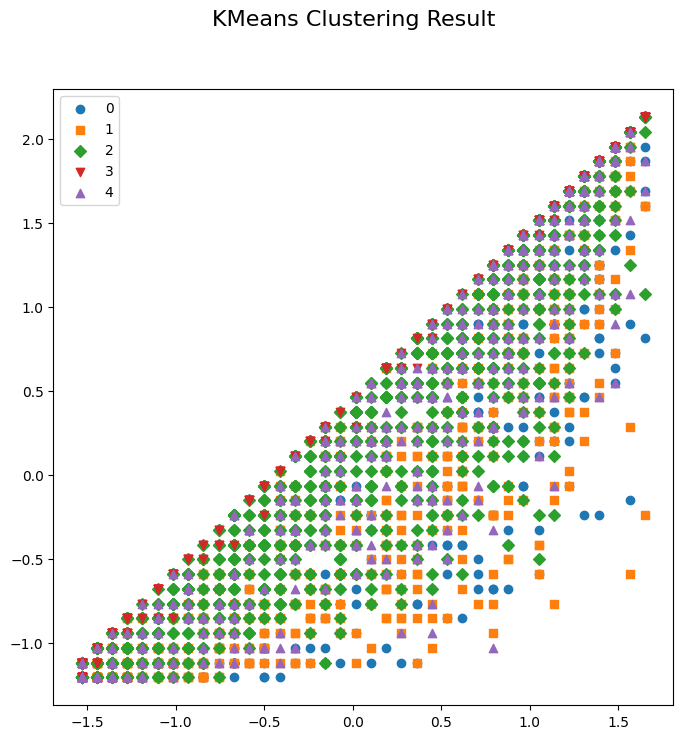

In [ ]:
from sklearn.cluster import KMeans

# 创建KMeans对象，指定簇的数量=5
kmeans = KMeans(n_clusters=5)

# 进行聚类
kmeans.fit(X_features_numeric)

# 获取聚类结果（每个样本所属的簇）
labels_kmeans = kmeans.labels_


plot_clusters(X_features_numeric, labels_kmeans, 'KMeans Clustering Result')

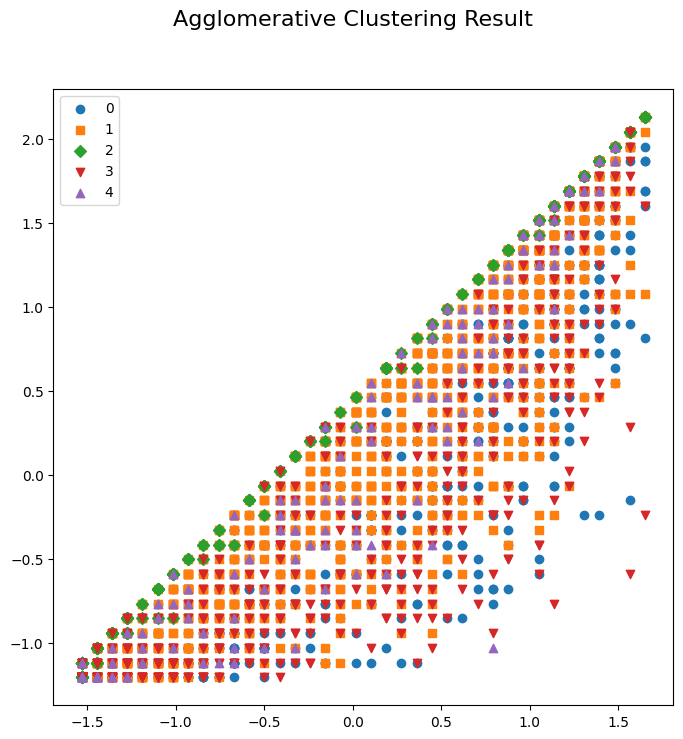

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)

# 进行聚类
agg_clustering.fit(X_features_numeric)

# 获取聚类结果（每个样本所属的簇）
labels_agg = agg_clustering.labels_

plot_clusters(X_features_numeric, labels_agg, 'Agglomerative Clustering Result')

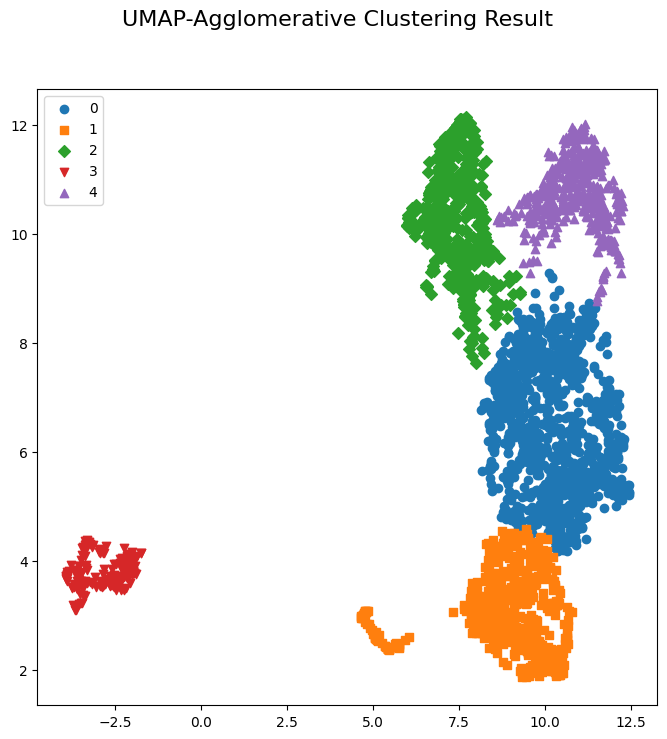

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5)

# 进行聚类
agg_clustering.fit(umap_emb)

# 获取聚类结果（每个样本所属的簇）
labels_agg = agg_clustering.labels_

plot_clusters(umap_emb, labels_agg, 'UMAP-Agglomerative Clustering Result')

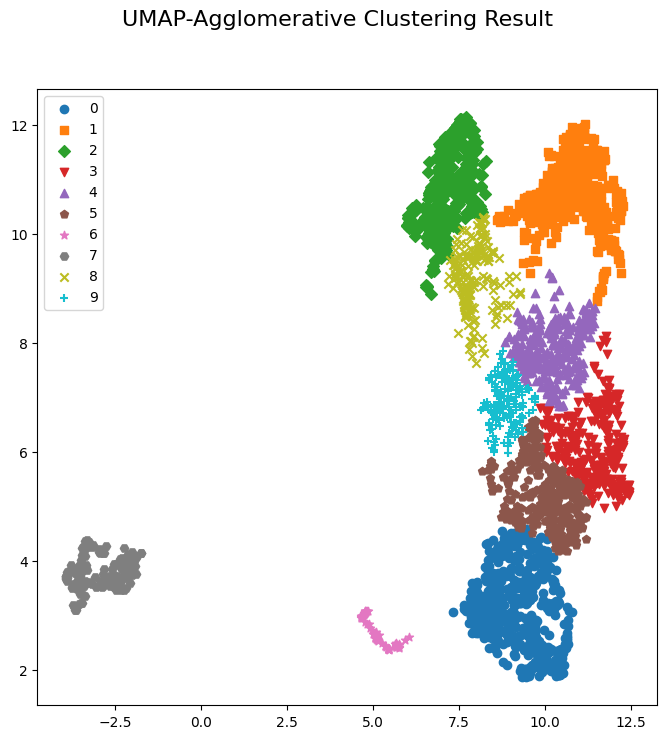

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=10)

# 进行聚类
agg_clustering.fit(umap_emb)

# 获取聚类结果（每个样本所属的簇）
labels_agg = agg_clustering.labels_

plot_clusters(umap_emb, labels_agg, 'UMAP-Agglomerative Clustering Result')

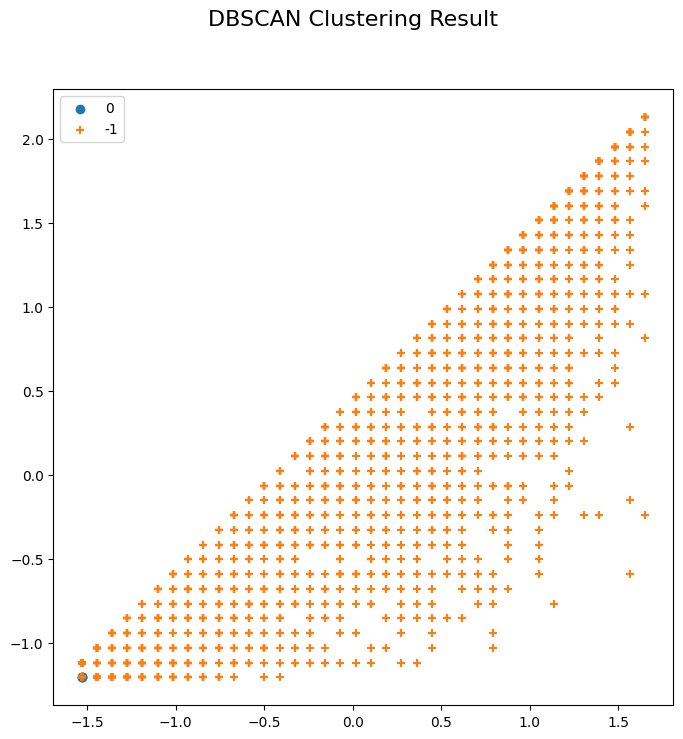

In [ ]:
from sklearn.cluster import DBSCAN

# 创建DBSCAN对象，指定eps邻域半径和min_samples最小样本数
dbscan = DBSCAN(eps=0.3, min_samples=3)

# 进行聚类
dbscan.fit(X_features_numeric)

# 获取聚类结果
labels_dbscan = dbscan.labels_

plot_clusters(X_features_numeric, labels_dbscan, 'DBSCAN Clustering Result')

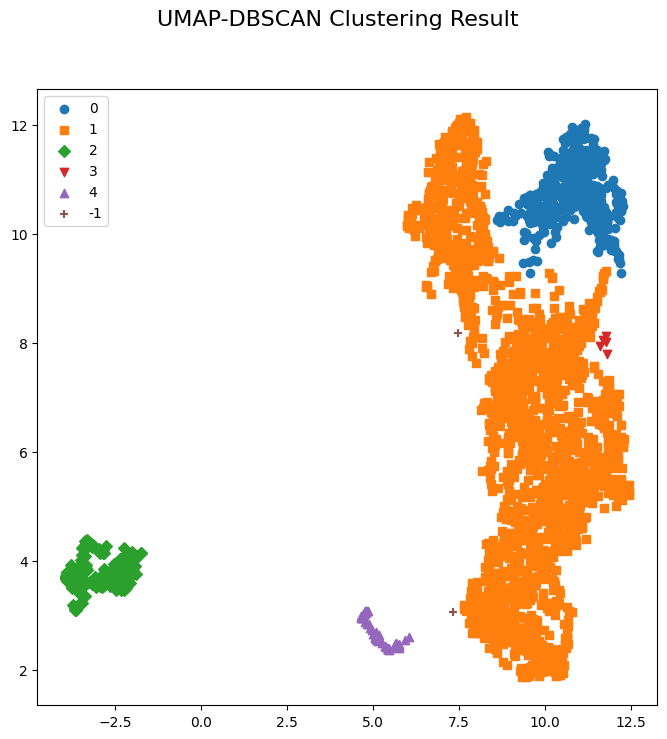

In [ ]:
#用降维后的数据dbscan试试
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)

umap_emb = umap.UMAP(n_components=2).fit_transform(X_features_numeric)
dbscan.fit(umap_emb)

labels_dbscan = dbscan.labels_

plot_clusters(umap_emb, labels_dbscan, 'UMAP-DBSCAN Clustering Result')

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


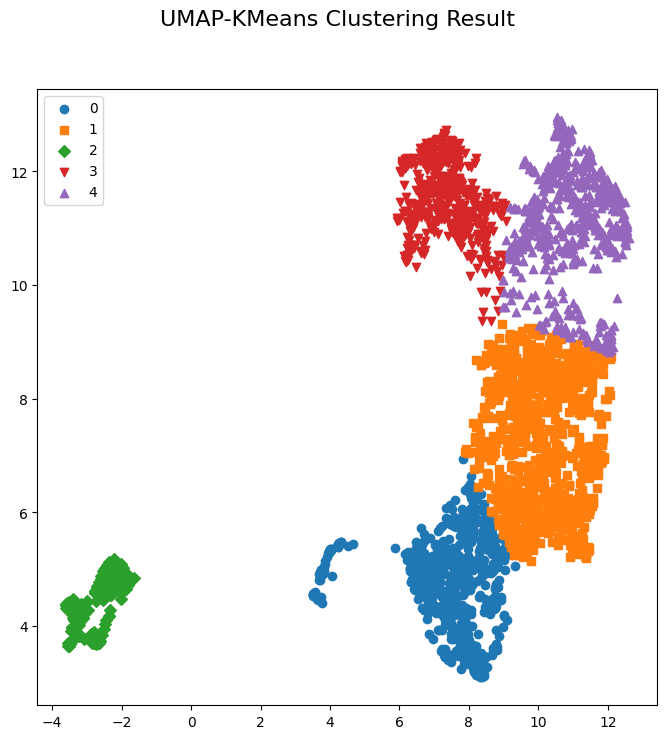

In [ ]:
import umap
from sklearn.cluster import KMeans

# 使用UMAP进行降维，将数据映射到2维空间
umap_emb = umap.UMAP(n_components=2).fit_transform(X_features_numeric)

# 创建KMeans对象，指定簇的数量=5
kmeans_umap = KMeans(n_clusters=5)

# 进行聚类
kmeans_umap.fit(umap_emb)

# 获取聚类结果（每个样本所属的簇）
labels_kmeans_umap = kmeans_umap.labels_

plot_clusters(umap_emb, labels_kmeans_umap, 'UMAP-KMeans Clustering Result')

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


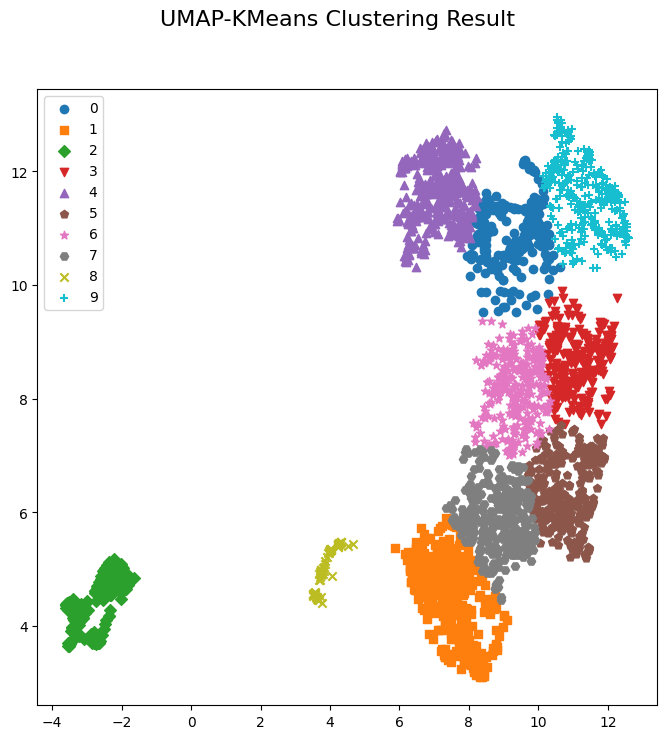

In [ ]:
# 创建KMeans对象，指定簇的数量=10
kmeans_umap2 = KMeans(n_clusters=10)

# 进行聚类
kmeans_umap2.fit(umap_emb)

# 获取聚类结果（每个样本所属的簇）
labels_kmeans_umap2 = kmeans_umap2.labels_

plot_clusters(umap_emb, labels_kmeans_umap2, 'UMAP-KMeans Clustering Result')